In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Данные

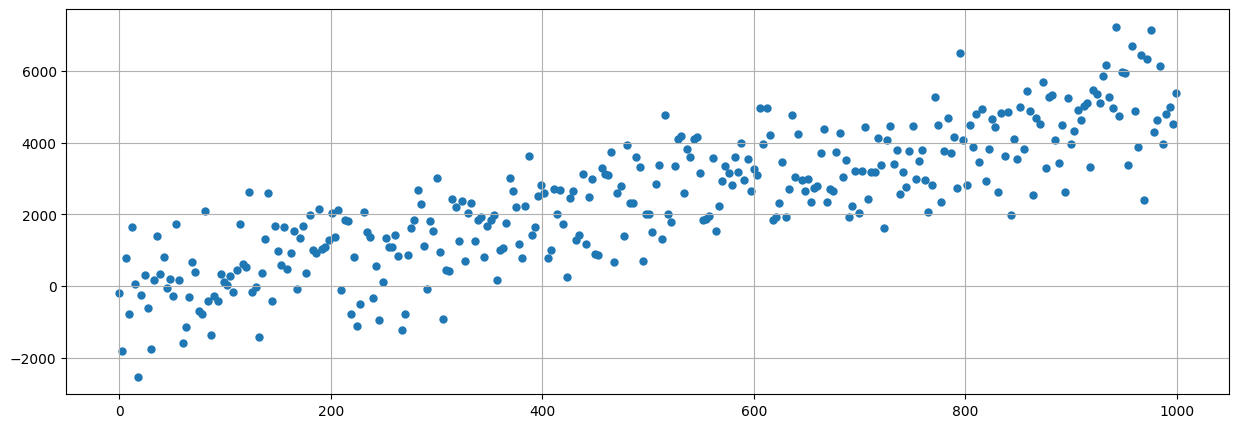

In [2]:
a, b = 5, -2  # коэффициенты для линейной регрессии
num_dots = 1000  # кол-во точек
step = 3  # шаг
rand_coeff = 1000  # уровень шума

x = np.array(range(0, num_dots, step))
y = (a * x + b).astype(float) + np.random.randn(1, len(x))[0] * rand_coeff

plt.figure(figsize=(15, 5))
plt.scatter(x, y, linewidths=0.01)
plt.grid(True)
plt.show()

In [3]:
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.66, shuffle=True)
x_train.shape, x_test.shape

((220, 1), (114, 1))

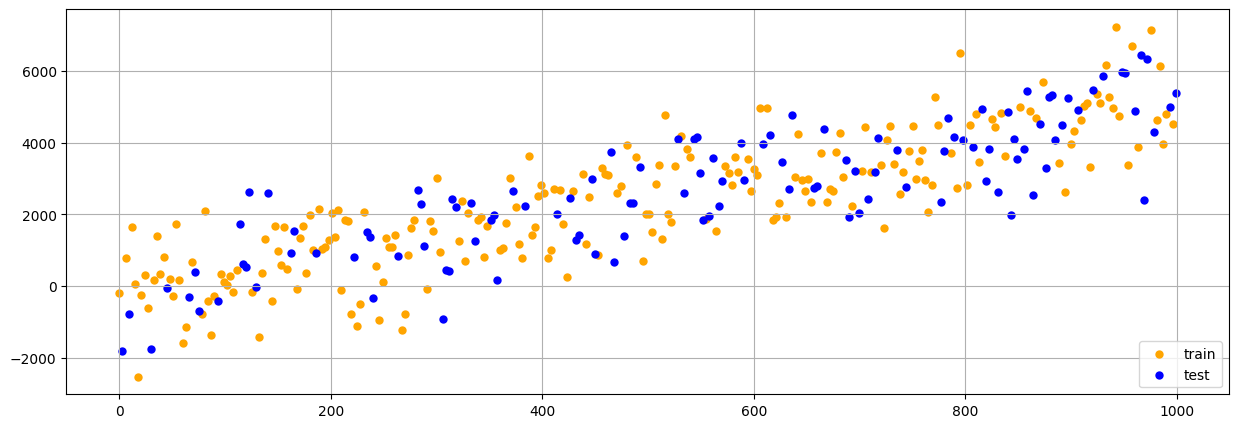

In [4]:
plt.figure(figsize=(15, 5))
plt.scatter(x_train, y_train, linewidths=0.01, c="orange")
plt.scatter(x_test, y_test, linewidths=0.01, c="blue")
plt.legend(["train", "test"], loc="lower right")
plt.grid(True)
plt.show()

### Линейная регрессия

Вычисление предсказания линейной регрессией для объекта $x_i \in \mathbb{R}^n$ :

$$f = w^T x_i + b, \quad w \in \mathbb{R}^n, b \in \mathbb{R}$$

Функция потерь на $i$-ом объекте:

$$L_i(f) = (y_i - f)^2$$

Производные функции по параметрам:

$$\frac{\partial L}{\partial w} = \frac{1}{m}\sum_{i=1}^{m} \frac{\partial L_i}{\partial w}$$

$$\frac{\partial L_i}{\partial w} = \frac{\partial L_i}{\partial f} \cdot \frac{\partial f}{\partial w} = 2 \cdot (f - y_i) \cdot x_i $$

$$\frac{\partial L}{\partial b} = \frac{1}{m}\sum_{i=1}^{m} \frac{\partial L_i}{\partial b}$$

$$\frac{\partial L_i}{\partial b} = \frac{\partial L_i}{\partial f} \cdot \frac{\partial f}{\partial b} = 2 \cdot (f - y_i) $$

Используются для минимизации функции потерь $L$ с помощью градиентного спуска:

$$w_{j+1} = w_j - \alpha \cdot \nabla \frac{\partial L}{\partial w}(w_j, b_j)$$

$$b_{j+1} = b_j - \alpha \cdot \nabla \frac{\partial L}{\partial b}(w_j, b_j)$$

In [5]:
class LinearRegression:
    """Класс линейной регрессии."""

    def __init__(self, learning_rate=0.005, epochs=1, report_interval=1):
        self.learning_rate = learning_rate  # шаг обучения
        self.epochs = epochs  # кол-во шагов градиентного спуска
        self.report_interval = report_interval  # через какой интервал считать характеристики

        self.num_obj = None  # кол-во объектов в обучающем наборе
        self.num_feat = None  # кол-во признаков
        self.weights = None  # веса
        self.bias = None  # свободный член
        # Списки ошибок.
        self.losses_train = None
        self.losses_test = None

    @staticmethod
    def __mean_squared_error(y_true, y_pred):
        """Среднеквадратичная ошибка."""
        return np.sum((y_true - y_pred) ** 2, axis=0) / len(y_true)

    def fit(self, X, y, eval_set=None):
        """Метод обучения модели."""

        # Количество объектов и признаков.
        self.num_obj, self.num_feat = X.shape
        # Инициализация весов (вектор 1 x num_feat) и свободного члена по закону нормального распределения.
        self.weights = np.random.randn(self.num_feat, 1) * 0.001
        self.bias = np.random.randn() * 0.001
        if eval_set is not None:
            self.losses_train = []
            self.losses_test = []

        # Эпохи - кол-во проходов по всему набору данных или кол-во шагов по антиградиенту.
        for epoch in range(self.epochs):
            # Инициализация градиента.
            grad_w = np.zeros((self.num_feat, 1))
            grad_b = 0

            # Цикл по всем объектам.
            for i in range(self.num_obj):
                # Линейная комбинация признаков.
                # Матричное произведение Xi (1 x num_feat) на w (num_feat x 1) плюс bias.
                f = (X[i].reshape(1, self.num_feat).dot(self.weights) + self.bias)[0][0]  # f - скаляр
                # Расчёт градиента.
                grad_w += (f - y[i]) * X[i].reshape(self.num_feat, 1)
                grad_b += (f - y[i])

            # Усреднение градиента.
            grad_w *= 2 / self.num_obj
            grad_b *= 2 / self.num_obj

            # Корректировка весов и свободного члена. Шаг в сторону антиградиента.
            self.weights = self.weights - self.learning_rate * grad_w
            self.bias = self.bias - self.learning_rate * grad_b

            # Сохранение ошибки для графика.
            if epoch % self.report_interval == 0 and eval_set is not None:
                self.losses_train.append(self.__mean_squared_error(y, self.predict(X)))
                self.losses_test.append(self.__mean_squared_error(eval_set[1], self.predict(eval_set[0])))

    def fit_vec(self, X, y, eval_set=None):
        """Метод обучения с использованием векторизации."""

        # Количество объектов и признаков.
        self.num_obj, self.num_feat = X.shape
        # Инициализация весов (вектор 1 x num_feat) и свободного члена по закону нормального распределения.
        self.weights = np.random.randn(self.num_feat, 1) * 0.001
        self.bias = np.random.randn() * 0.001
        if eval_set is not None:
            self.losses_train = []
            self.losses_test = []

        # Эпохи - кол-во проходов по всему набору данных или кол-во шагов по антиградиенту.
        for epoch in range(self.epochs):
            # Линейная комбинация признаков.
            F = X.dot(self.weights) + self.bias

            # Расчёт градиента.
            grad_w = (2 / self.num_obj) * np.sum((F.reshape(self.num_obj, 1) - y.reshape(self.num_obj, 1)) * X, axis=0)
            grad_b = (2 / self.num_obj) * np.sum((F.reshape(self.num_obj, 1) - y.reshape(self.num_obj, 1)), axis=0)

            # Корректировка весов и свободного члена. Шаг в сторону антиградиента.
            self.weights = self.weights - self.learning_rate * grad_w.reshape(self.num_feat, 1)
            self.bias = self.bias - self.learning_rate * grad_b

            # Сохранение ошибки для графика.
            if epoch % self.report_interval == 0 and eval_set is not None:
                self.losses_train.append(self.__mean_squared_error(y, self.predict(X)))
                self.losses_test.append(self.__mean_squared_error(eval_set[1], self.predict(eval_set[0])))

    def predict(self, X):
        """Функция предсказаний."""
        predictions = np.array([x.reshape(1, self.num_feat).dot(self.weights) + self.bias for x in X])
        return predictions.reshape(*X.shape)

In [6]:
def coeff_deter(y_true, y_pred):
    """Коэффициент детерминации."""
    return (1 - (np.sum((y_true - y_pred) ** 2, axis=0) / np.sum((y_true - np.mean(y_true)) ** 2, axis=0)))[0]

### Используя цикл

In [7]:
%%time
model = LinearRegression(learning_rate=1e-7, epochs=200, report_interval=10)
model.fit(x_train, y_train, eval_set=(x_test, y_test))
predictions = model.predict(x_test)

print(f"Weights: {model.weights[0]}, bias: {model.bias[0]}")
print(f"R^2: {coeff_deter(y_test, predictions)}\n")

Weights: [4.99846517], bias: 0.0044509327507794155
R^2: 0.7011883527180395

CPU times: total: 984 ms
Wall time: 960 ms


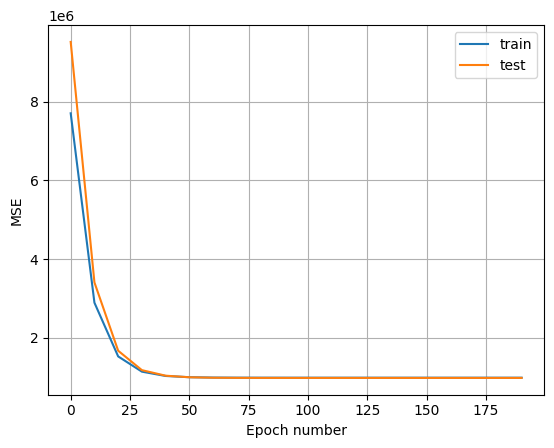

In [8]:
epoch_numbers = np.arange(0, len(model.losses_train)) * model.report_interval

plt.plot(epoch_numbers, model.losses_train, label="train")
plt.plot(epoch_numbers, model.losses_test, label="test")
plt.xlabel("Epoch number")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)

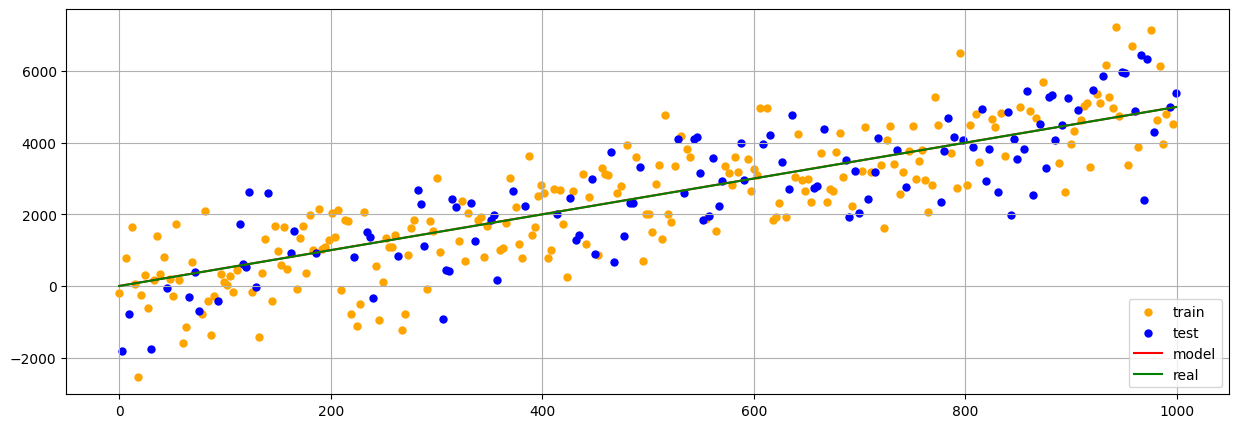

In [9]:
plt.figure(figsize=(15, 5))
plt.scatter(x_train, y_train, linewidths=0.01, c="orange")
plt.scatter(x_test, y_test, linewidths=0.01, c="blue")
plt.plot(x, model.weights[0] * x + model.bias, c="red")
plt.plot(x, a * x + b, c="green")
plt.legend(["train", "test", "model", "real"], loc ="lower right")
plt.grid(True)
plt.show()

### Используя векторизацию

In [10]:
%%time
model = LinearRegression(learning_rate=1e-7, epochs=200, report_interval=10)
model.fit_vec(x_train, y_train, eval_set=(x_test, y_test))
predictions = model.predict(x_test)

print(f"Weights: {model.weights[0]}, bias: {model.bias[0]}")
print(f"R^2: {coeff_deter(y_test, predictions)}\n")

Weights: [4.99846845], bias: 0.00233464263518436
R^2: 0.7011884139643187

CPU times: total: 62.5 ms
Wall time: 58 ms


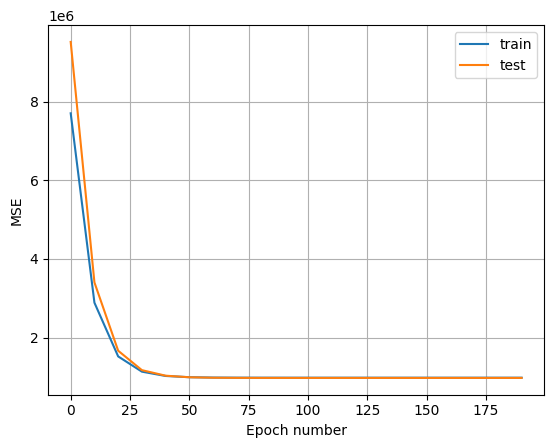

In [11]:
epoch_numbers = np.arange(0, len(model.losses_train)) * model.report_interval

plt.plot(epoch_numbers, model.losses_train, label="train")
plt.plot(epoch_numbers, model.losses_test, label="test")
plt.xlabel("Epoch number")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)

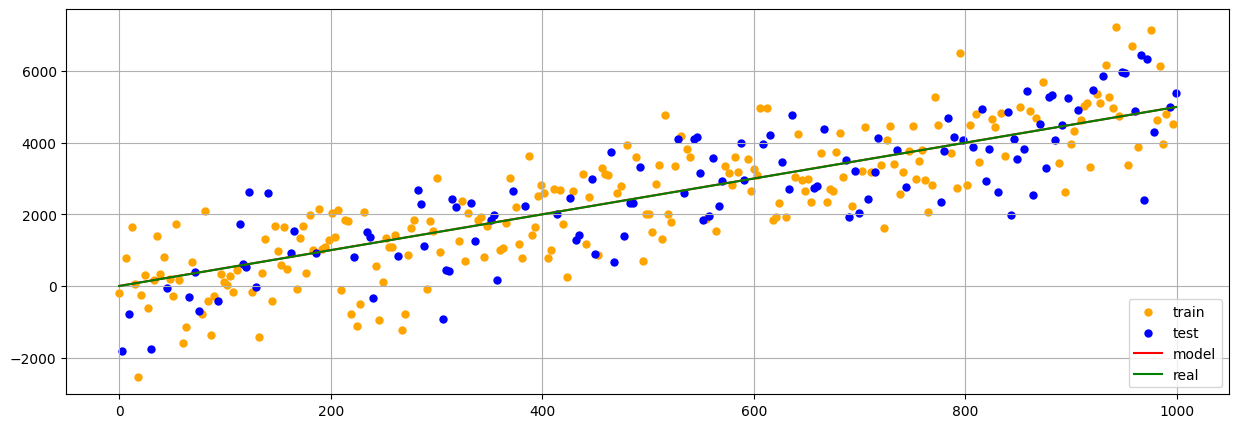

In [12]:
plt.figure(figsize=(15, 5))
plt.scatter(x_train, y_train, linewidths=0.01, c="orange")
plt.scatter(x_test, y_test, linewidths=0.01, c="blue")
plt.plot(x, model.weights[0] * x + model.bias[0], c="red")
plt.plot(x, a * x + b, c="green")
plt.legend(["train", "test", "model", "real"], loc ="lower right")
plt.grid(True)
plt.show()